# t-Test Example

Code adapted from [Practical Statistics for Data Scientists](https://github.com/gedeck/practical-statistics-for-data-scientists) with love.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
session_times = pd.read_csv('web_page_data.csv')
session_times.Time = 100 * session_times.Time

In [3]:
session_times.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


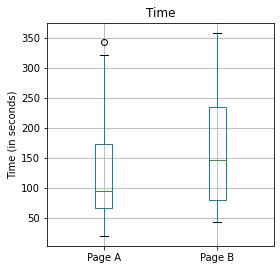

In [4]:
ax = session_times.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

plt.tight_layout()
plt.show()

In [5]:
page_a_mean = session_times[session_times.Page == 'Page A'].Time.mean()
page_b_mean = session_times[session_times.Page == 'Page B'].Time.mean()
for page, mean in zip(['Page A', 'Page B'], [page_a_mean, page_b_mean]):
    print(f'Mean of {page} session times = {mean:.2f} seconds')

print()
print(f'Difference between means = {abs(page_a_mean - page_b_mean):.2f} seconds')

Mean of Page A session times = 126.33 seconds
Mean of Page B session times = 162.00 seconds

Difference between means = 35.67 seconds


## Is that a statistically significant difference between means? 

One way is to deploy a t-test. Use [`scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). From the documentation: 

>Calculate the T-test for the means of two independent samples of scores.
> 
> This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

We reason that our samples do not have identical variances (see IQR), so we must change the default. 

$H_0$: means are equal

$H_a$: mean of Page A sessions < mean of Page B sessions

In [6]:
t_statistic, pvalue = scipy.stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time, 
                                            session_times[session_times.Page == 'Page B'].Time,
                                            equal_var=False)
print(f'p-value for one sided test: {pvalue/2:.4f}')

p-value for one sided test: 0.1408


Thus, we cannot reject the null hypothesis. 

If $H_a$ was that the means were simply unequal, we would have not divided `pvalue` in half, and it would be termed a two-sided test. 